## Comparing code
---

In [ ]:
# modules to compare
import importlib

import igraph_testing as ig
import igraph_testing_main as ig2   #comparing with other version of igraph_testing
import descriptors as ds

importlib.reload(ig)
importlib.reload(ig2)
importlib.reload(ds)


<module 'descriptors' from '/Users/hwi/Develop/ClassSrc/CSE302/py-graspi/notebook/3d_2d_tests/descriptors.py'>

In [56]:
# single file comparison
targetFileName = '4x3x2'    
#failed descriptors only
failonly = False

In [59]:
########################################  readme  #####################################
# comparing the descriptors between new version and old version
# you can change targetFileName variable(line 25) to run the code with different file
# if the descriptors are the same, then you can see OK and value
#######################################################################################

import os
import time
import matplotlib.pyplot as plt
import tracemalloc


current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon = 1e-5

loop_cnt = 1

def run_test(lib, test_file):
    total_graph_time = 0
    tracemalloc.start()
    graph_start = time.time()
    g, *_ = lib.generateGraph(data_path + test_file + ".txt")
    _stats = tracemalloc.get_traced_memory()
    graph_end = time.time()
    tracemalloc.stop()

    graph_mem = _stats[1] - _stats[0]
    stats = ds.desciptors(g)
    graph_time = graph_end - graph_start
    return stats, graph_time, graph_mem

# Run and compare for both ig and ig2
def test(singlefileonly):
    for test_file in test_files:
        if singlefileonly == True and targetFileName not in test_file:
                continue

        print(f"--- {test_file} ---")

        # Run for ig
        stats_ig, time_ig, mem_ig = run_test(ig, test_file)

        # Run for ig2
        stats_ig2, time_ig2, mem_ig2 = run_test(ig2, test_file)

        print("\n[Descriptor Comparison]")

        with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
            for line in f:
                stat = line.strip().split(" ")
                try:
                    # if stats.get(stat[0], -1) == int(stat[1]):
                    if failonly == False and abs(stats_ig.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"new {stat[0]} passed")
                    elif stats_ig.get(stat[0], -1) != -1 and stats_ig.get(stat[0], -1) != int(stat[1]):
                        print(f"new {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")

                    if failonly == False and abs(stats_ig2.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"prev {stat[0]} passed")
                    elif stats_ig2.get(stat[0], -1) != -1 and stats_ig2.get(stat[0], -1) != int(stat[1]):
                        print(f"prev {stat[0]} failed - {stats_ig2.get(stat[0])} is not the same as expected {stat[1]}")
                    # print("-----------------")

                except ValueError:
                    if failonly == False and abs(stats_ig.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"new {stat[0]} passed")
                    elif stats_ig.get(stat[0], -1) != -1 and stats_ig.get(stat[0], -1) != float(stat[1]):
                        print(f"new {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")

                    if failonly == False and abs(stats_ig2.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"prev {stat[0]} passed")
                    elif stats_ig2.get(stat[0], -1) != -1 and stats_ig2.get(stat[0], -1) != float(stat[1]):
                        print(f"prev {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")
                    # print("-----------------")


        # Time and memory comparison
        # print("\n[Performance Comparison]")
        # print(f"Graph Generation Time - new: {time_ig:.6f}s, prev: {time_ig2:.6f}s")
        # print(f"Graph Memory Usage     - new: {mem_ig} bytes, prev: {mem_ig2} bytes")
        # print(f"Descriptor Time        - new: {stats_ig['time']:.6f}s, prev: {stats_ig2['time']:.6f}s")
        # print(f"Descriptor Memory      - new: {stats_ig['mem']} bytes, prev: {stats_ig2['mem']} bytes")
        print()



In [60]:
#all file comparision
test(singlefileonly=True)

--- data_4x3x2 ---

[Descriptor Comparison]
new STAT_n passed
prev STAT_n passed
new STAT_e passed
prev STAT_e failed - 22 is not the same as expected 24
new STAT_n_D passed
prev STAT_n_D passed
new STAT_n_A passed
prev STAT_n_A passed
new STAT_CC_D passed
prev STAT_CC_D passed
new STAT_CC_A passed
prev STAT_CC_A passed
new STAT_CC_D_An passed
prev STAT_CC_D_An passed
new STAT_CC_A_Ca passed
prev STAT_CC_A_Ca passed
new ABS_f_D passed
prev ABS_f_D passed
new CT_f_conn_D_An passed
prev CT_f_conn_D_An passed
new CT_f_conn_A_Ca passed
prev CT_f_conn_A_Ca passed
new CT_n_D_adj_An failed - 6 is not the same as expected 7
prev CT_n_D_adj_An failed - 6 is not the same as expected 7
new CT_n_A_adj_Ca failed - 6 is not the same as expected 7
prev CT_n_A_adj_Ca failed - 6 is not the same as expected 7



## Visualize 
---


In [ ]:
import testing_helper as tst
importlib.reload(tst)

<module 'hwi_testing_functions' from '/Users/hwi/Develop/ClassSrc/CSE302/py-graspi/notebook/3d_2d_tests/hwi_testing_functions.py'>

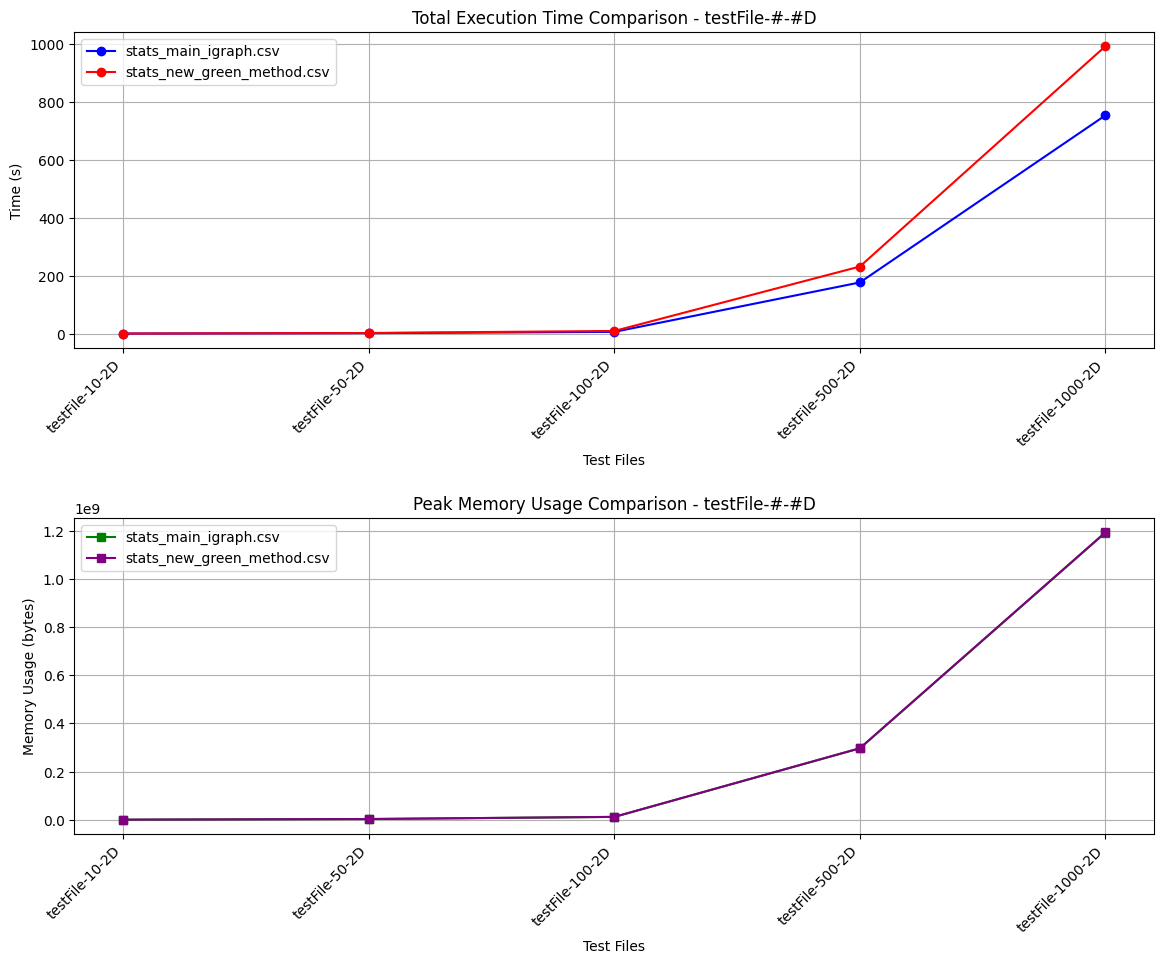

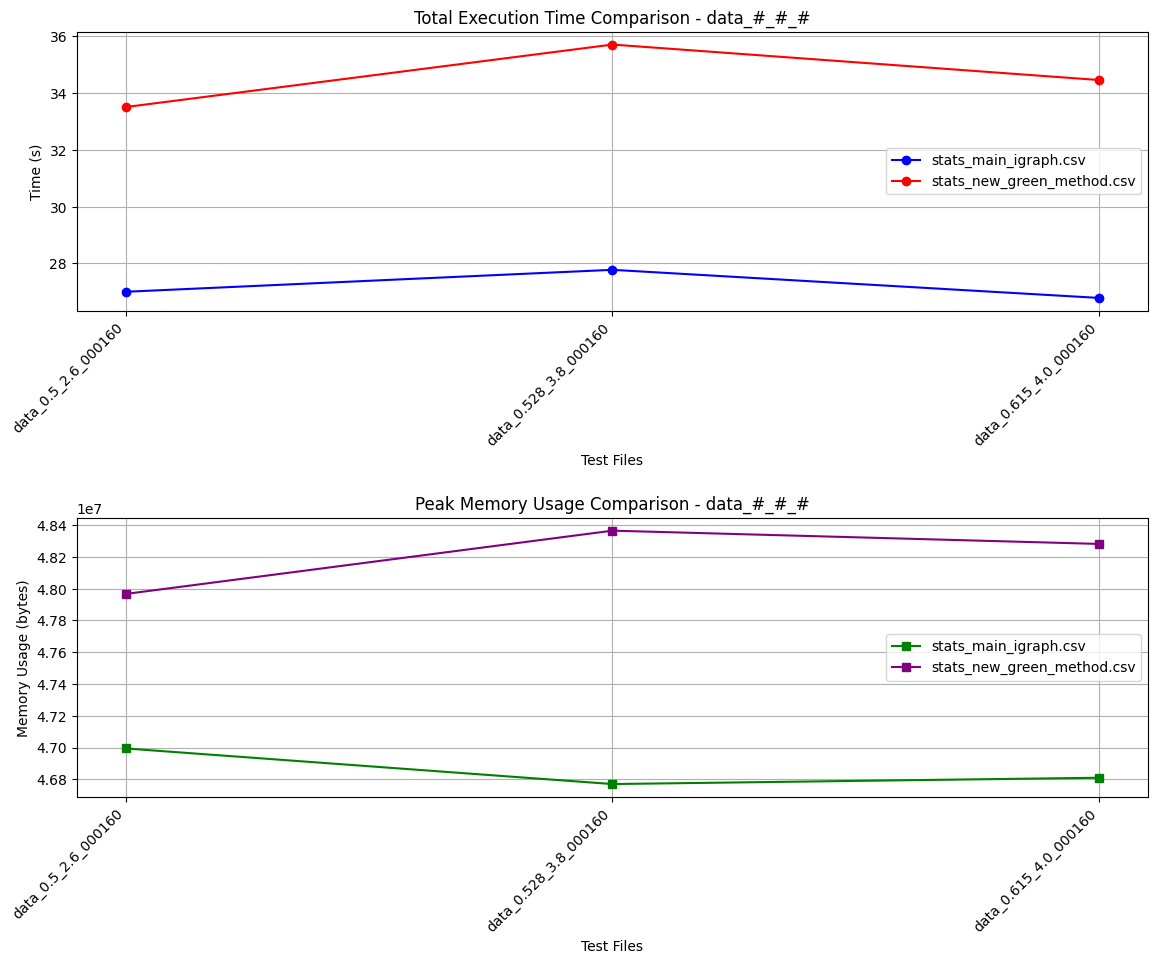

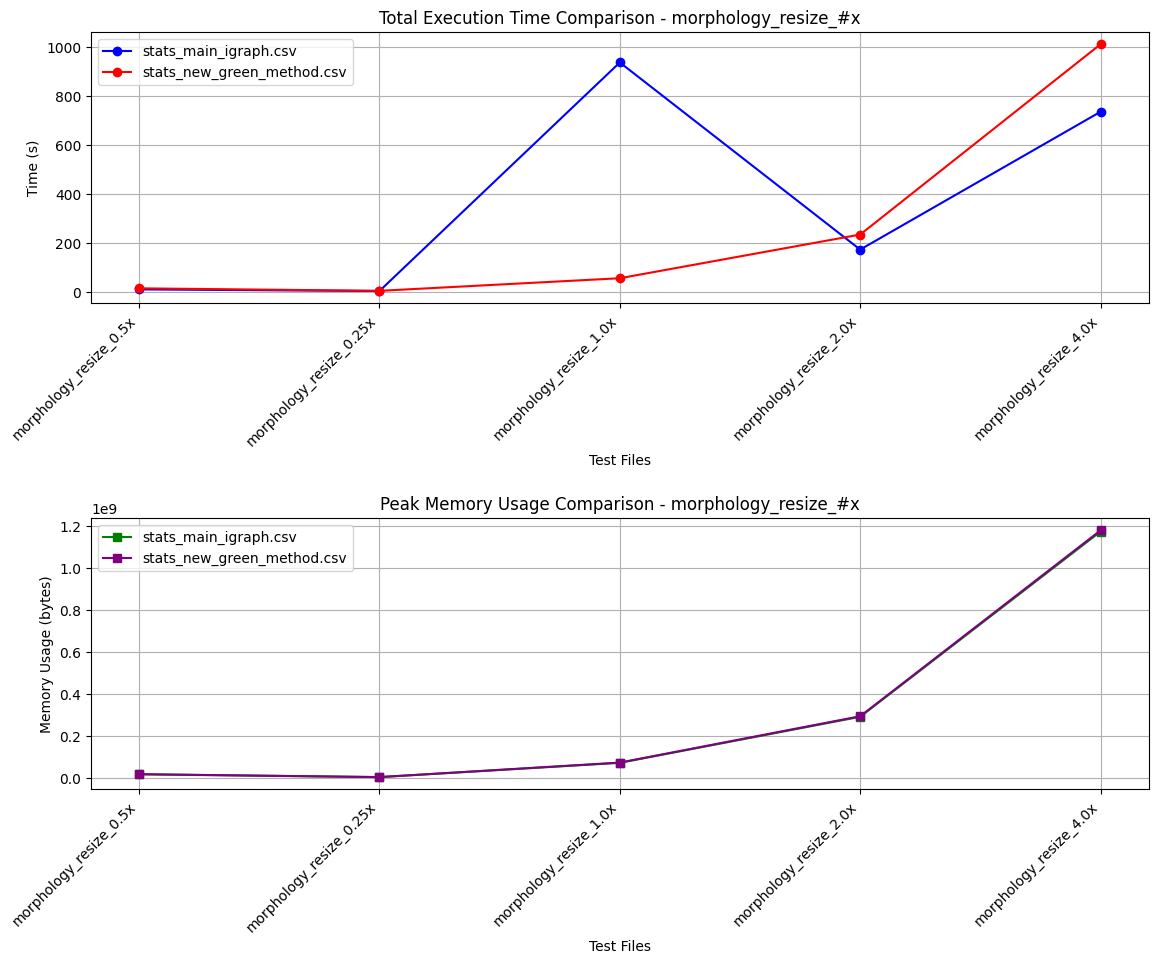

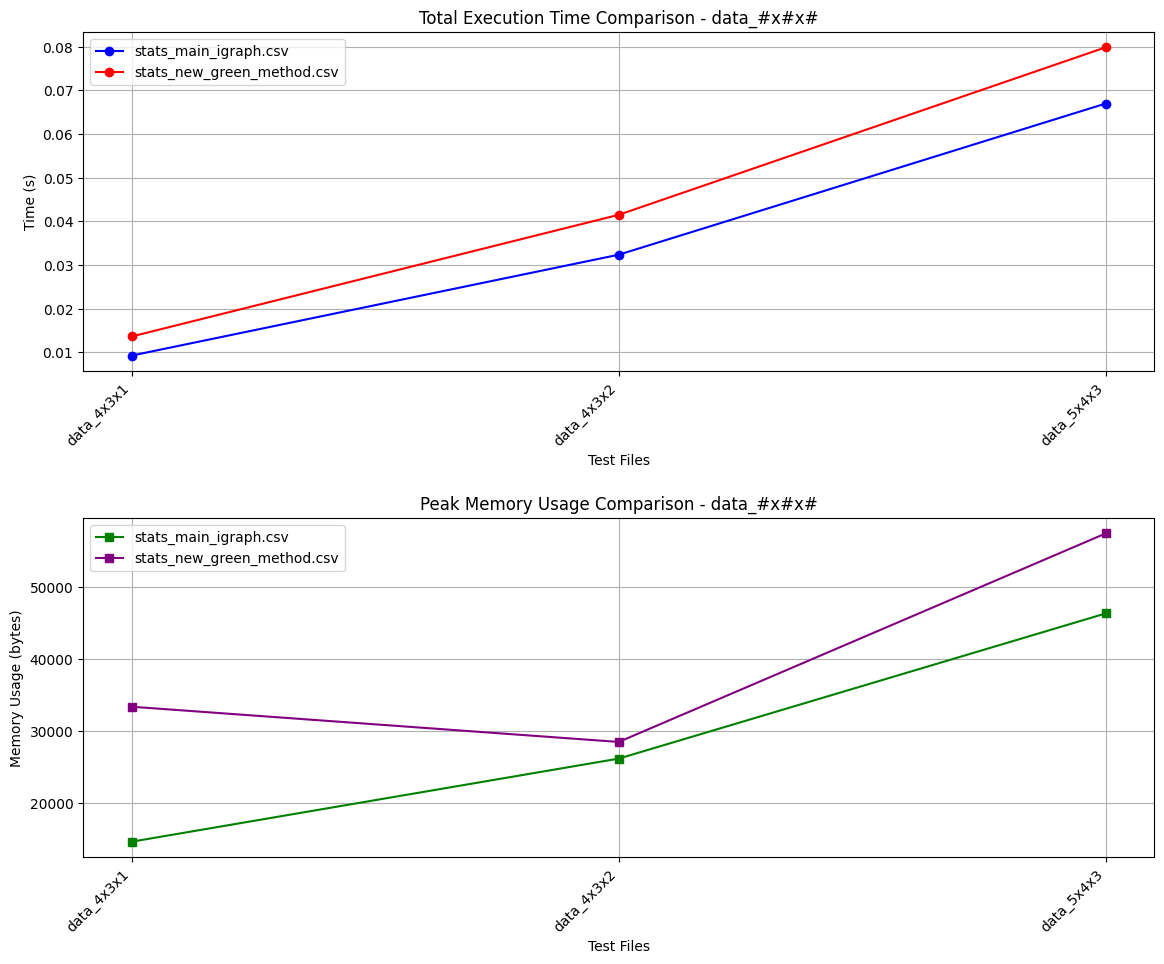

In [62]:
tst.plot_total_execution_and_memory_compare('stats_main_igraph.csv', 'stats_new_green_method.csv')